<a href="https://colab.research.google.com/github/David-Gentil/Regressao-Linear_DNC/blob/main/Regress%C3%A3o_Linear_e_Vari%C3%A1veis_Categ%C3%B3ricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Em particular, discutiremos como transformar variáveis categóricas em variáveis dummy para incluí-las em modelos de regressão linear (OLS) com o objetivo de prever o limite de crédito de clientes de um banco.

A transcrição em análise traz um desafio proposto para transformar novas variáveis categóricas (escolaridade, gênero e estado dos clientes) em variáveis dummy. Além disso, é solicitado ajustar iterativamente o modelo OLS até que os p-values indiquem um bom ajuste.

#Desafio: Modelo Preditivo com novas Variáveis

No desafio proposto na transcrição, recebemos um conjunto de dados de clientes de um banco com o objetivo de prever seus limites de crédito.

Inicialmente, já tínhamos desenvolvido um modelo OLS com as variáveis disponíveis. Porém, o banco disponibilizou novas variáveis categóricas: escolaridade, gênero e estado dos clientes.

Precisamos incluir essas novas variáveis no modelo existente para tentar melhorar seu poder preditivo. Como são categóricas, precisaremos aplicar a transformação para variáveis dummy.

#Transformação das Variáveis Categóricas

Vamos supor que as novas variáveis possuem os seguintes níveis (categorias):


*   Escolaridade: Fundamental, Médio, Superior
*   Gênero: Masculino, Feminino
*   Estado: SP, RJ, MG, ES

In [33]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [34]:
#Importando o dataset
Limite = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Regressão Linear_Exercício/Limite_Credito_Dummy.xlsx')
Limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [35]:
#Criando Dummies
Limite = pd.get_dummies(Limite, columns=['Escolaridade', 'Região', 'Gênero'], prefix=['Escolaridade', 'Região', 'Gênero'])
Limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Região_RJ,Região_SP,Gênero_F,Gênero_M
0,70,10736,5214,400,500,True,False,True,False,True,False
1,68,5000,5000,380,600,True,False,True,False,True,False
2,44,5800,5800,500,800,True,False,True,False,True,False
3,72,4300,4300,2000,1000,True,False,True,False,True,False
4,75,4400,4400,3000,1000,True,False,True,False,True,False


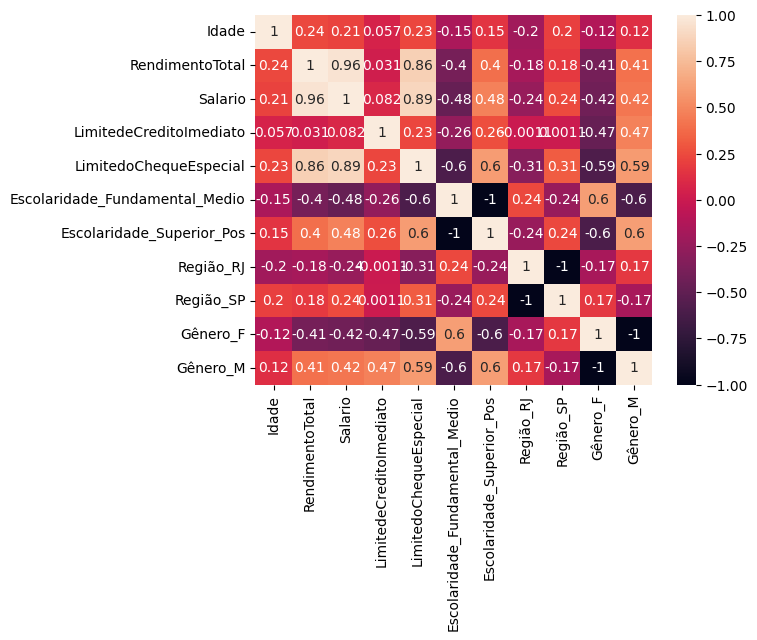

In [36]:
#Plotando heatmap para verificar correlação numérica
sns.heatmap(Limite.corr(), annot=True);

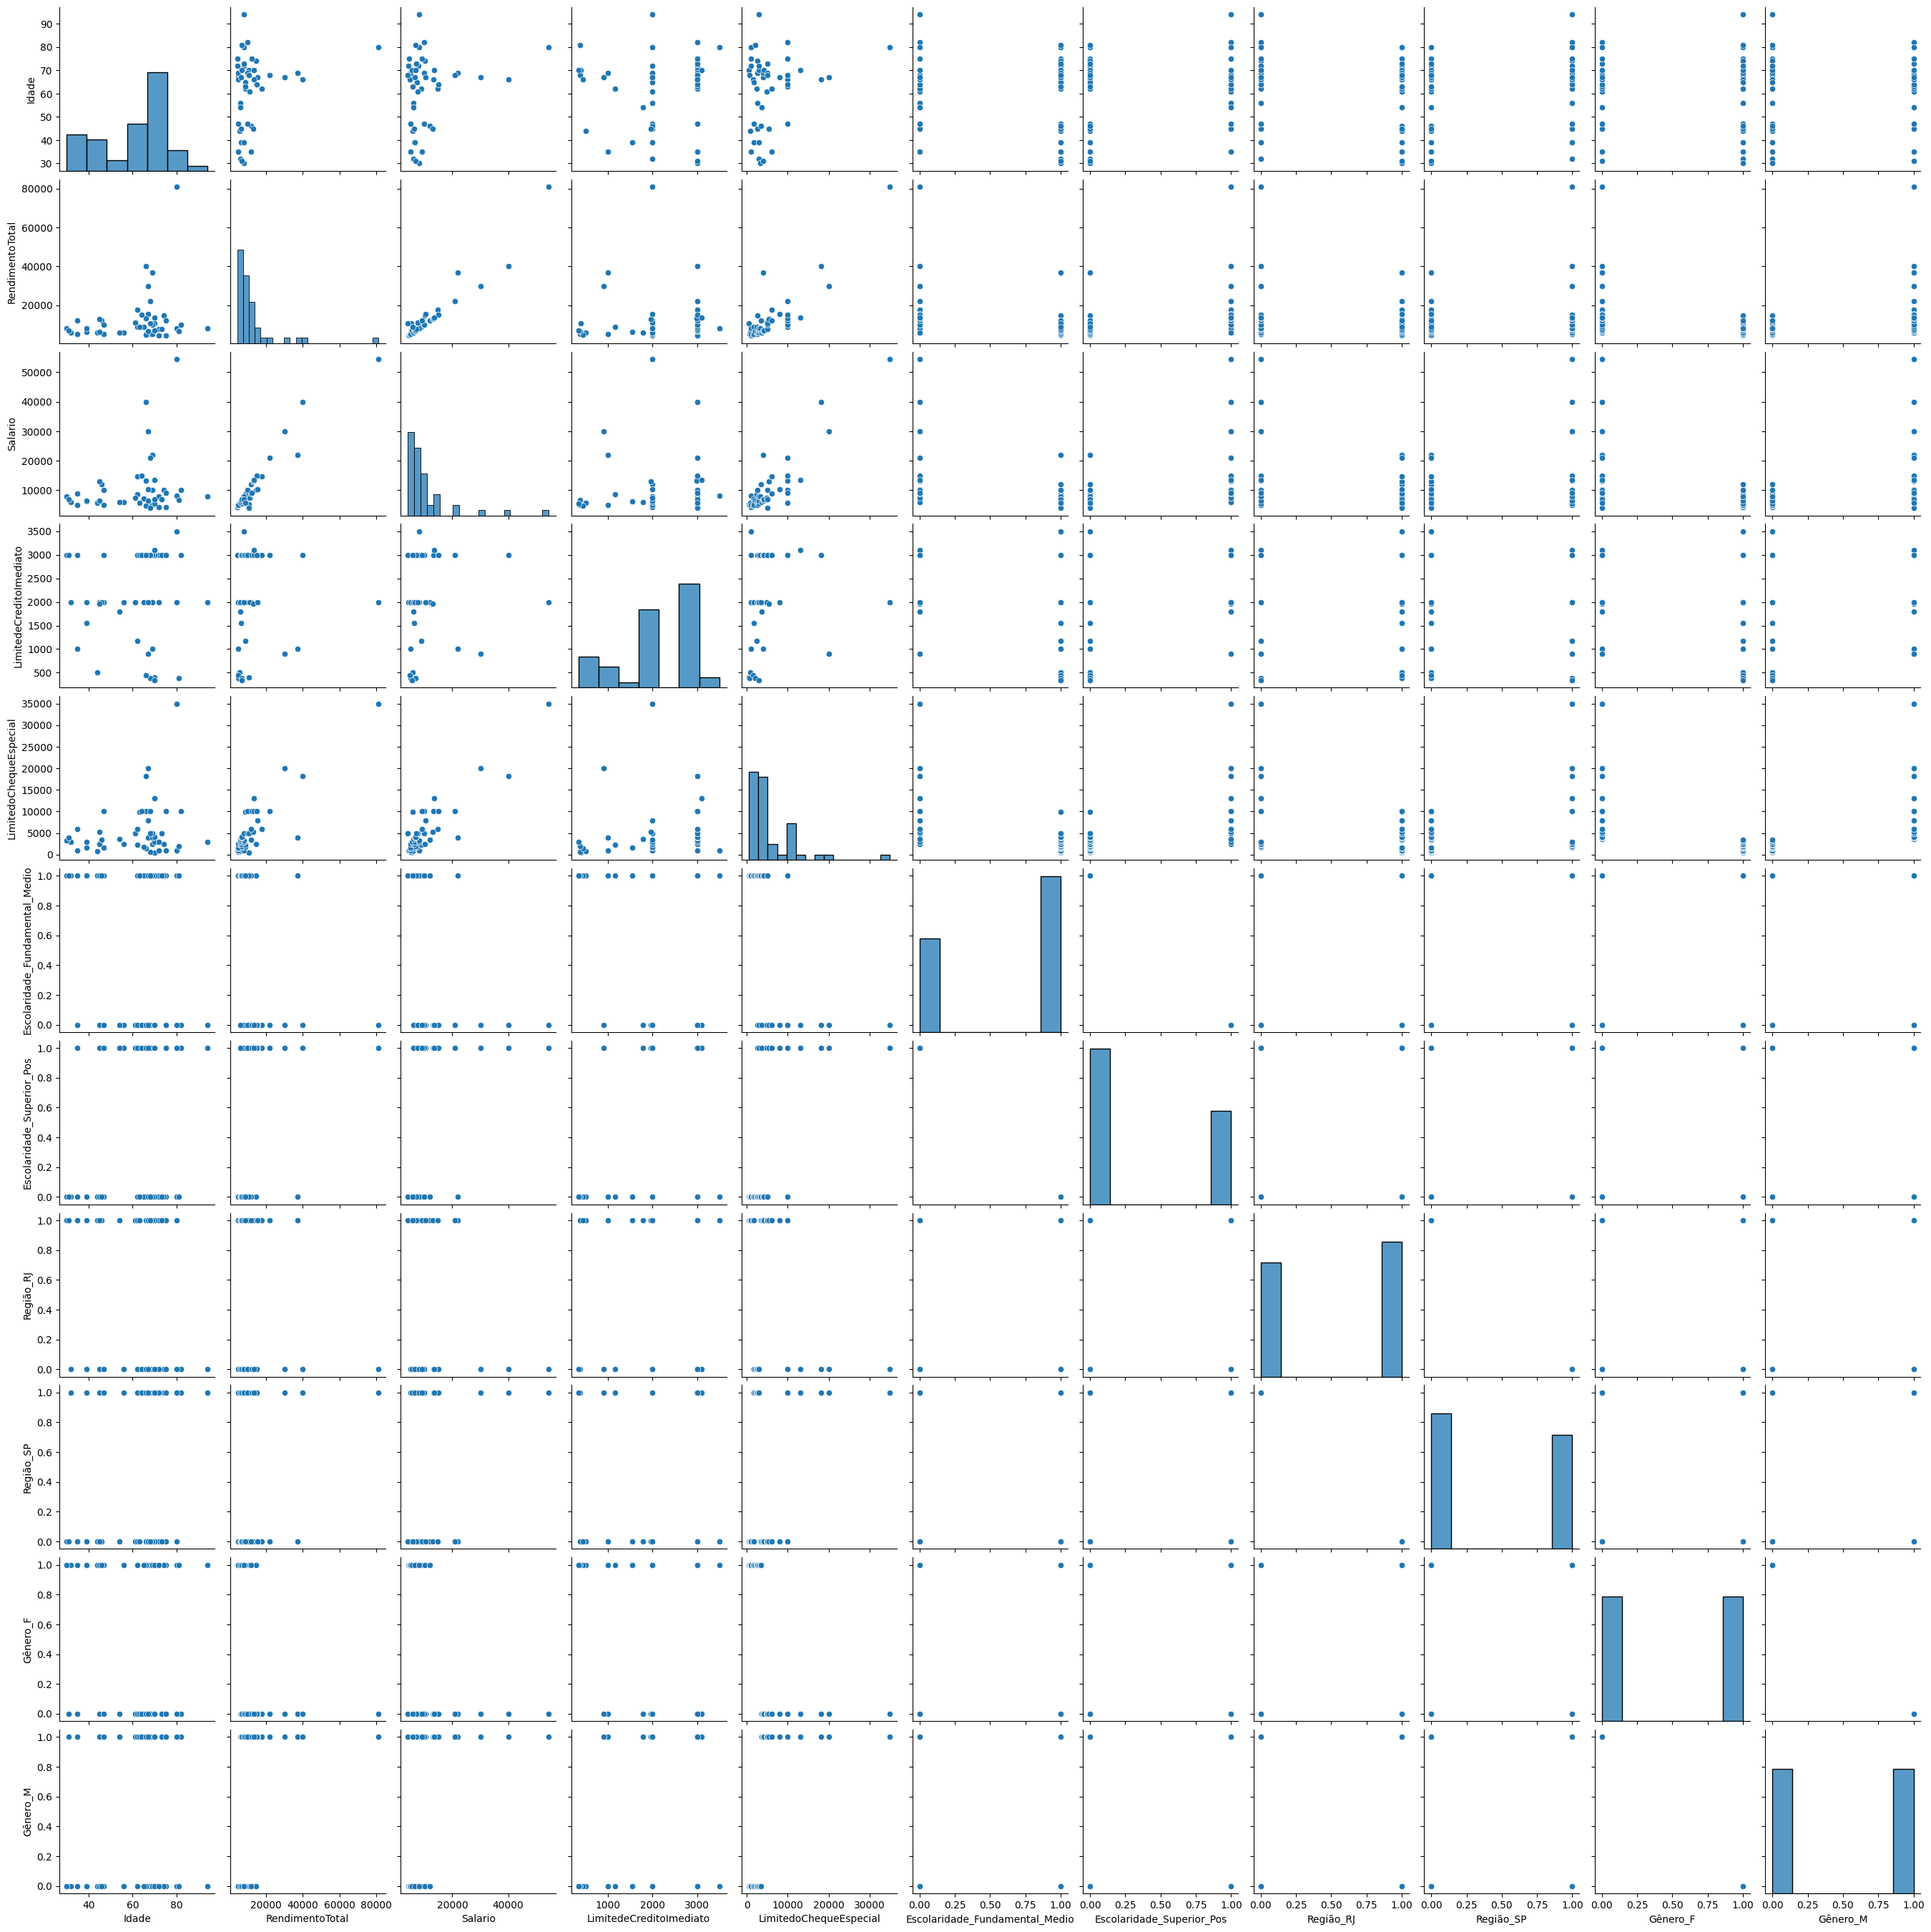

In [37]:
#Plotando Pairplot para verificar correlação gráfica
sns.pairplot(Limite);

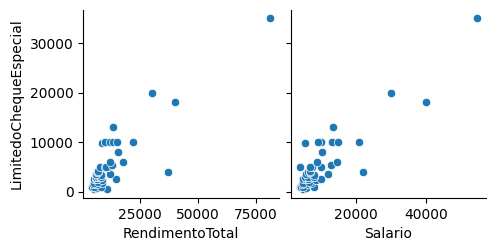

In [38]:
#Plotando o Pairplot das principais correlações encontradas
sns.pairplot(Limite, x_vars=['RendimentoTotal', 'Salario'], y_vars=['LimitedoChequeEspecial']);

#Seleção de Variáveis e Ajuste do Modelo

In [49]:
##modelo MRLS
mrls = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato + Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           7.44e-17
Time:                            22:00:26   Log-Likelihood:                -434.21
No. Observations:                      48   AIC:                             884.4
Df Residuals:                          40   BIC:                             899.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [50]:
##modelo MRLS retirando Idade
mrls = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato + Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           9.97e-18
Time:                            22:00:35   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [51]:
##modelo MRLS retirando  Escolaridade_Fundamental_Medio
mrls = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           9.97e-18
Time:                            22:00:45   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [52]:
##modelo MRLS retirando Intercept
mrls = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M-1'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           9.97e-18
Time:                            22:01:12   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [53]:
##modelo MRLS retirando LimitedeCreditoImediato
mrls = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M-1'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           1.39e-18
Time:                            22:01:56   Log-Likelihood:                -434.44
No. Observations:                      48   AIC:                             880.9
Df Residuals:                          42   BIC:                             892.1
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [54]:
##modelo MRLS retirando RendimentoTotal
mrls = 'LimitedoChequeEspecial~Salario+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M-1'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.880
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     78.87
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           3.15e-19
Time:                            22:02:33   Log-Likelihood:                -435.33
No. Observations:                      48   AIC:                             880.7
Df Residuals:                          43   BIC:                             890.0
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [55]:
##modelo MRLS retirando Escolaridade_Superior_Pos
mrls = 'LimitedoChequeEspecial~Salario+Região_RJ+Região_SP+Gênero_F+Gênero_M-1'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           3.24e-20
Time:                            22:03:08   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [56]:
##modelo MRLS retirando Região_RJ
mrls = 'LimitedoChequeEspecial~Salario+Região_SP+Gênero_F+Gênero_M-1'
modelo = smf.ols(formula=mrls, data=Limite).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Sun, 09 Mar 2025   Prob (F-statistic):           3.24e-20
Time:                            22:04:34   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
